In [1]:
# Imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Sample dataset
data = {
    'sleep_hours': [8, 9, 7, 6, 10, 5, 6, 8, 9, 4],
    'screen_time': [2, 1, 3, 5, 0.5, 6, 4.5, 1.5, 1, 6.5],
    'healthy': [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # 1 = Healthy, 0 = Not
}
df = pd.DataFrame(data)

In [3]:

X = df[['sleep_hours', 'screen_time']]
y = df['healthy']

In [4]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [5]:
# KNN model (k=5)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Pyt

In [6]:
# Evaluation
print("\nModel 2: Kids' Health (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Model 2: Kids' Health (KNN)
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [7]:
# Visualization
xx, yy = np.meshgrid(np.arange(X['sleep_hours'].min()-1, X['sleep_hours'].max()+1, 0.1),
                     np.arange(X['screen_time'].min()-1, X['screen_time'].max()+1, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


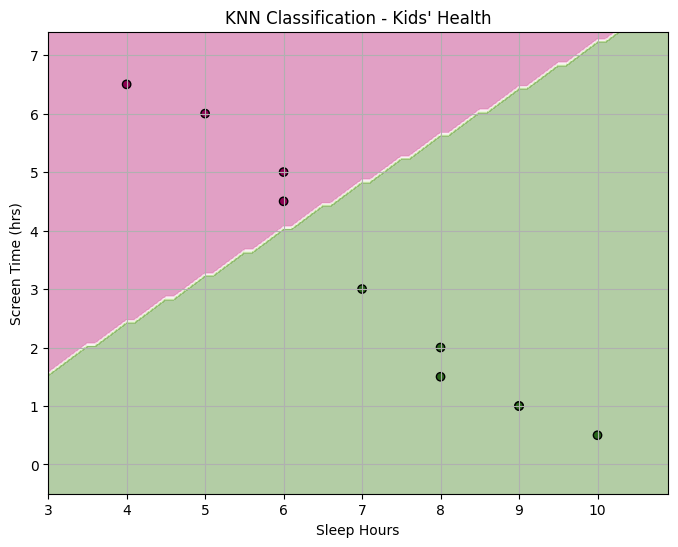

In [8]:

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='PiYG')
plt.scatter(X['sleep_hours'], X['screen_time'], c=y, cmap='PiYG', edgecolor='k')
plt.title("KNN Classification - Kids' Health")
plt.xlabel('Sleep Hours')
plt.ylabel('Screen Time (hrs)')
plt.grid(True)
plt.show()
